# Prophet model

In [1]:
# Load data and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Load the data
#df = pd.read_excel('PARTIAL_Capstone_Data.xlsx', engine='openpyxl')
df = pd.read_csv('Deaths_by_County.csv')


In [2]:
import pandas as pd
from prophet import Prophet

#Somehow create a loop to go through all jurisdictions and save predictions for a year in advance
#Choose your Jurisdiction here
df_Prophet_run = df[df['jurisdiction']=='San Francisco County']

#We only care about the date and the number of deaths
prophet_df = df_Prophet_run[['month', 'deaths']].copy()
#Rename to statistics names
prophet_df.rename(columns={'month': 'ds', 'deaths': 'y'}, inplace=True)
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
# Initialize the Prophet model
m = Prophet()

18:32:51 - cmdstanpy - INFO - Chain [1] start processing
18:32:52 - cmdstanpy - INFO - Chain [1] done processing


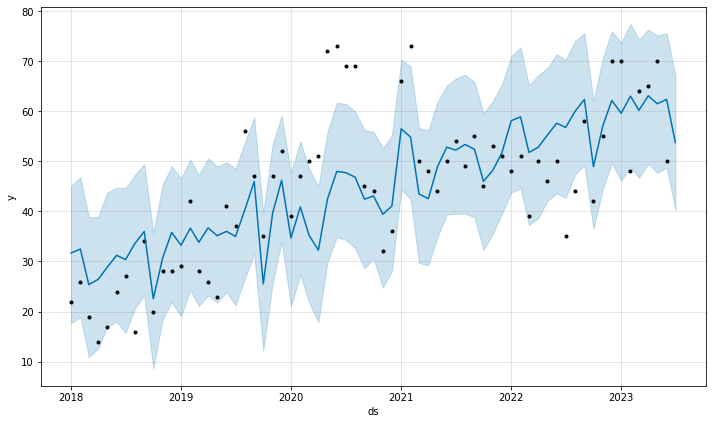

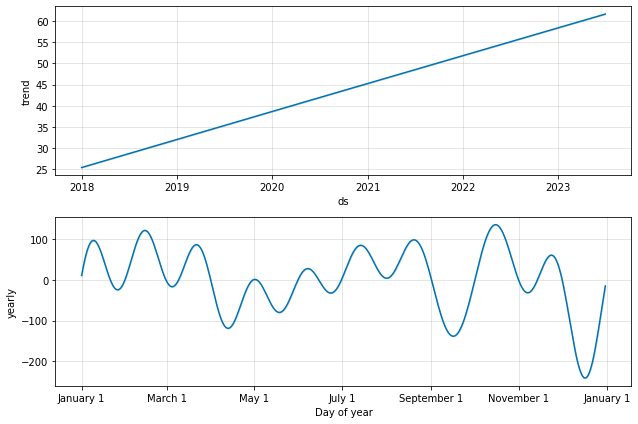

In [3]:
# Fit the model with your DataFrame
m.fit(prophet_df)

#This needs to be looped again to go through several periods
# Create a DataFrame for future predictions
future_periods = 1  # Define the number of periods you want to forecast
future = m.make_future_dataframe(periods=future_periods, freq='M')

# Make predictions including the regressor
forecast = m.predict(future)

# Plot the forecast
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


Accuracy within ±1 deaths: 4.55%
Accuracy within ±2 deaths: 10.61%
Accuracy within ±3 deaths: 22.73%
Accuracy within ±4 deaths: 25.76%
Accuracy within ±5 deaths: 36.36%
Accuracy within ±7 deaths: 51.52%
Accuracy within ±9 deaths: 63.64%
Accuracy within ±10 deaths: 69.70%
Accuracy within ±13 deaths: 81.82%
Accuracy within ±20 deaths: 92.42%


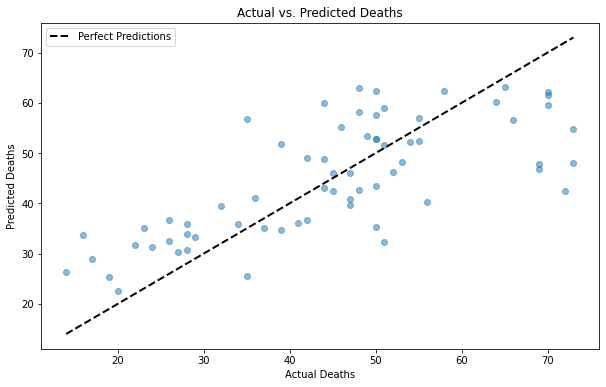

In [4]:
# Assuming 'df' contains the actual 'y' values and a 'ds' column for dates
results = forecast[['ds', 'yhat']].merge(prophet_df[['ds', 'y']], on='ds', how='inner')

tolerance_levels = [1, 2, 3, 4, 5, 7, 9, 10, 13, 20]

for tol in tolerance_levels:
    results[f'within_{tol}'] = abs(results['yhat'] - results['y']) <= tol
    accuracy = results[f'within_{tol}'].mean() * 100  # Convert to percentage
    print(f"Accuracy within ±{tol} deaths: {accuracy:.2f}%")
    
# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(results['y'], results['yhat'], alpha=0.5)  # Adjust alpha for point transparency

# Adding plot labels and title
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Actual vs. Predicted Deaths')

# Optionally, add a line of best fit or y=x line to indicate perfect predictions
import numpy as np
line_start = min(results['y'].min(), results['yhat'].min())
line_end = max(results['y'].max(), results['yhat'].max())
plt.plot([line_start, line_end], [line_start, line_end], 'k--', lw=2, label='Perfect Predictions')
plt.legend()

# Show the plot
plt.show()



In [5]:
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
print(f'RMSE: {rmse}')

RMSE: 10.569010307389409


# Output data to a datafoundation. Month and Prediction

# Export the df to Excel to use in Tableau